In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from matplotlib.font_manager import FontProperties

In [3]:
import warnings

warnings.simplefilter("ignore")

## データ

RANSAS から取得した総務省データ


In [4]:
df_jp_all = pd.read_csv("./csv_data/一人あたり賃金_全国_全産業_2010-2021.csv", encoding="utf-8")
df_jp_ind = pd.read_csv("./csv_data/一人あたり賃金_全国_産業別_2010-2021.csv", encoding="utf-8")
df_jp_category = pd.read_csv(
    "./csv_data/一人あたり賃金_全国_産業業種別_2010-2021.csv", encoding="utf-8"
)
df_pref_all = pd.read_csv("./csv_data/一人あたり賃金_都道府県_全産業_2010-2021.csv", encoding="utf-8")
df_pref_ind = pd.read_csv("./csv_data/一人あたり賃金_都道府県_産業別_2010-2021.csv", encoding="utf-8")
df_pref_category = pd.read_csv(
    "./csv_data/一人あたり賃金_都道府県_産業業種別_2010-2021.csv", encoding="utf-8"
)

In [5]:
print(df_jp_all.shape)
print(df_jp_all.dtypes)
df_jp_all.head(3)

(156, 5)
集計年                   int64
年齢                   object
所定内給与額（万円）          float64
年間賞与その他特別給与額（万円）    float64
一人当たり賃金（万円）         float64
dtype: object


,集計年,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
0,2010,年齢計,29.4853,75.9365,429.7601
1,2010,～19歳,16.8445,12.5918,214.7264
2,2010,20～24歳,19.5045,33.6702,267.7245


In [6]:
print(df_jp_ind.shape)
print(df_jp_ind.dtypes)
df_jp_ind.head(3)

(2496, 7)
集計年                   int64
産業大分類コード             object
産業大分類名               object
年齢                   object
所定内給与額（万円）          float64
年間賞与その他特別給与額（万円）    float64
一人当たり賃金（万円）         float64
dtype: object


,集計年,産業大分類コード,産業大分類名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
0,2010,C,鉱業，採石業，砂利採取業,年齢計,31.0115,91.5266,463.6649
1,2010,C,鉱業，採石業，砂利採取業,～19歳,18.3745,25.8164,246.3109
2,2010,C,鉱業，採石業，砂利採取業,20～24歳,20.4155,65.8033,310.7887


In [7]:
print(df_jp_category.shape)
print(df_jp_category.dtypes)
df_jp_category.head(3)

(5304, 9)
集計年                   int64
産業大分類コード             object
産業大分類名               object
業種中分類コード             object
業種中分類名               object
年齢                   object
所定内給与額（万円）          float64
年間賞与その他特別給与額（万円）    float64
一人当たり賃金（万円）         float64
dtype: object


,集計年,産業大分類コード,産業大分類名,業種中分類コード,業種中分類名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
0,2010,E,製造業,09,食料品製造業,年齢計,23.1516,54.0802,331.8996
1,2010,E,製造業,09,食料品製造業,～19歳,15.6792,13.1140,201.2640
2,2010,E,製造業,09,食料品製造業,20～24歳,16.9485,31.4626,234.8442


In [8]:
print(df_pref_all.shape)
print(df_pref_all.dtypes)
df_pref_all.head(3)

(7332, 7)
集計年                   int64
都道府県コード               int64
都道府県名                object
年齢                   object
所定内給与額（万円）          float64
年間賞与その他特別給与額（万円）    float64
一人当たり賃金（万円）         float64
dtype: object


,集計年,都道府県コード,都道府県名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
0,2010,1,北海道,年齢計,26.09,63.21,376.29
1,2010,1,北海道,～19歳,15.29,13.33,196.81
2,2010,1,北海道,20～24歳,18.20,27.06,245.46


In [9]:
print(df_pref_ind.shape)
print(df_pref_ind.dtypes)
df_pref_ind.head(3)

(117312, 9)
集計年                  int64
都道府県コード              int64
都道府県名               object
産業大分類コード            object
産業大分類名              object
年齢                  object
所定内給与額（万円）          object
年間賞与その他特別給与額（万円）    object
一人当たり賃金（万円）         object
dtype: object


,集計年,都道府県コード,都道府県名,産業大分類コード,産業大分類名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
0,2010,1,北海道,C,鉱業，採石業，砂利採取業,年齢計,28.19,69.23,407.51
1,2010,1,北海道,C,鉱業，採石業，砂利採取業,～19歳,18.84,19.88,245.96
2,2010,1,北海道,C,鉱業，採石業，砂利採取業,20～24歳,21.14,89.35,343.03


In [10]:
print(df_pref_category.shape)
print(df_pref_category.dtypes)
df_pref_category.head(3)

(249288, 11)
集計年                  int64
都道府県コード              int64
都道府県名               object
産業大分類コード            object
産業大分類名              object
業種中分類コード            object
業種中分類名              object
年齢                  object
所定内給与額（万円）          object
年間賞与その他特別給与額（万円）    object
一人当たり賃金（万円）         object
dtype: object


,集計年,都道府県コード,都道府県名,産業大分類コード,産業大分類名,業種中分類コード,業種中分類名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
0,2010,1,北海道,E,製造業,09,食料品製造業,年齢計,19.31,48.52,280.24
1,2010,1,北海道,E,製造業,09,食料品製造業,～19歳,15.25,30.64,213.64
2,2010,1,北海道,E,製造業,09,食料品製造業,20～24歳,14.3,18.86,190.46


## ユニークデータ確認


In [11]:
df_pref_category["産業大分類名"].unique()

array(['製造業', '情報通信業', '卸売業，小売業', '学術研究，専門・技術サービス業', '宿泊業，飲食サービス業',
       '生活関連サービス業，娯楽業', '教育，学習支援業', '医療，福祉', 'サービス業（他に分類されないもの）'],
      dtype=object)

In [12]:
df_pref_category["産業大分類名"].nunique()

9

In [13]:
df_pref_category["年齢"].unique()

array(['年齢計', '～19歳', '20～24歳', '25～29歳', '30～34歳', '35～39歳', '40～44歳',
       '45～49歳', '50～54歳', '55～59歳', '60～64歳', '65～69歳', '70歳～'],
      dtype=object)

In [14]:
df_pref_category["年齢"].nunique()

13

In [15]:
df_pref_category["業種中分類名"].unique()

array(['食料品製造業', '飲料・たばこ・飼料製造業', '繊維工業', '木材・木製品製造業（家具を除く）', '家具・装備品製造業',
       'パルプ・紙・紙加工品製造業', '印刷・同関連業', '化学工業', 'プラスチック製品製造業（別掲を除く）',
       'ゴム製品製造業', '窯業・土石製品製造業', '鉄鋼業', '非鉄金属製造業', '金属製品製造業', 'はん用機械器具製造業',
       '生産用機械器具製造業', '業務用機械器具製造業', '電子部品・デバイス・電子回路製造業', '電気機械器具製造業',
       '情報通信機械器具製造業', '輸送用機械器具製造業', 'その他の製造業', '情報サービス業', '卸売業', '小売業',
       '専門サービス業（他に分類されないもの）', '広告業', '宿泊業', '娯楽業', '学校教育', 'その他の教育，学習支援業',
       '医療業', '職業紹介・労働者派遣業', 'その他の事業サービス業'], dtype=object)

In [16]:
df_pref_category["業種中分類名"].nunique()

34

In [17]:
print(df_jp_all.duplicated().any())
print(df_jp_ind.duplicated().any())
print(df_jp_category.duplicated().any())
print(df_pref_all.duplicated().any())
print(df_pref_ind.duplicated().any())
print(df_pref_category.duplicated().any())

False
False
False
False
False
False


## 欠損値確認


In [18]:
df_jp_all.isnull().sum()

集計年                 0
年齢                  0
所定内給与額（万円）          0
年間賞与その他特別給与額（万円）    0
一人当たり賃金（万円）         0
dtype: int64

In [19]:
df_jp_ind.isnull().sum()

集計年                 0
産業大分類コード            0
産業大分類名              0
年齢                  0
所定内給与額（万円）          0
年間賞与その他特別給与額（万円）    0
一人当たり賃金（万円）         0
dtype: int64

In [20]:
df_jp_category.isnull().sum()

集計年                 0
産業大分類コード            0
産業大分類名              0
業種中分類コード            0
業種中分類名              0
年齢                  0
所定内給与額（万円）          0
年間賞与その他特別給与額（万円）    0
一人当たり賃金（万円）         0
dtype: int64

In [21]:
df_pref_all.isnull().sum()

集計年                 0
都道府県コード             0
都道府県名               0
年齢                  0
所定内給与額（万円）          0
年間賞与その他特別給与額（万円）    0
一人当たり賃金（万円）         0
dtype: int64

In [22]:
df_pref_ind.isnull().sum()

集計年                 0
都道府県コード             0
都道府県名               0
産業大分類コード            0
産業大分類名              0
年齢                  0
所定内給与額（万円）          0
年間賞与その他特別給与額（万円）    0
一人当たり賃金（万円）         0
dtype: int64

In [23]:
df_pref_category.isnull().sum()

集計年                 0
都道府県コード             0
都道府県名               0
産業大分類コード            0
産業大分類名              0
業種中分類コード            0
業種中分類名              0
年齢                  0
所定内給与額（万円）          0
年間賞与その他特別給与額（万円）    0
一人当たり賃金（万円）         0
dtype: int64

### 集計列に特定の文字列を持つ DF の行抽出 (pref_ind, pref_category)

- 直接 float にしようとすると, 以下コメントアウトされた処理はエラーになる
  - ハイフンが入っているため float に変換できない


In [24]:
# df_pref_ind['所定内給与額（万円）'] = df_pref_ind['所定内給与額（万円）'].astype(float)

In [25]:
# df_pref_category['所定内給与額（万円）'] = df_pref_category['所定内給与額（万円）'].astype(float)

ハイフンが入っている行を抽出してみる

- 企業に勤めている可能性が低い年齢層の給与額にハイフンを与えている印象
- ハイフン一文字のみで欠損を表しているらしい


In [26]:
df_pref_category[df_pref_category["所定内給与額（万円）"] == "-"]

,集計年,都道府県コード,都道府県名,産業大分類コード,産業大分類名,業種中分類コード,業種中分類名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
37,2010,1,北海道,E,製造業,11,繊維工業,65～69歳,-,-,-
38,2010,1,北海道,E,製造業,11,繊維工業,70歳～,-,-,-
53,2010,1,北海道,E,製造業,13,家具・装備品製造業,～19歳,-,-,-
64,2010,1,北海道,E,製造業,13,家具・装備品製造業,70歳～,-,-,-
77,2010,1,北海道,E,製造業,14,パルプ・紙・紙加工品製造業,70歳～,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...
249224,2021,47,沖縄県,O,教育，学習支援業,81,学校教育,～19歳,-,-,-
249237,2021,47,沖縄県,O,教育，学習支援業,82,その他の教育，学習支援業,～19歳,-,-,-
249248,2021,47,沖縄県,O,教育，学習支援業,82,その他の教育，学習支援業,70歳～,-,-,-
249250,2021,47,沖縄県,P,医療，福祉,83,医療業,～19歳,-,-,-


In [27]:
df_pref_category[df_pref_category["所定内給与額（万円）"] == "-"]

,集計年,都道府県コード,都道府県名,産業大分類コード,産業大分類名,業種中分類コード,業種中分類名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
37,2010,1,北海道,E,製造業,11,繊維工業,65～69歳,-,-,-
38,2010,1,北海道,E,製造業,11,繊維工業,70歳～,-,-,-
53,2010,1,北海道,E,製造業,13,家具・装備品製造業,～19歳,-,-,-
64,2010,1,北海道,E,製造業,13,家具・装備品製造業,70歳～,-,-,-
77,2010,1,北海道,E,製造業,14,パルプ・紙・紙加工品製造業,70歳～,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...
249224,2021,47,沖縄県,O,教育，学習支援業,81,学校教育,～19歳,-,-,-
249237,2021,47,沖縄県,O,教育，学習支援業,82,その他の教育，学習支援業,～19歳,-,-,-
249248,2021,47,沖縄県,O,教育，学習支援業,82,その他の教育，学習支援業,70歳～,-,-,-
249250,2021,47,沖縄県,P,医療，福祉,83,医療業,～19歳,-,-,-


In [28]:
df_pref_category[df_pref_category["所定内給与額（万円）"].str.contains("-")]

,集計年,都道府県コード,都道府県名,産業大分類コード,産業大分類名,業種中分類コード,業種中分類名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
37,2010,1,北海道,E,製造業,11,繊維工業,65～69歳,-,-,-
38,2010,1,北海道,E,製造業,11,繊維工業,70歳～,-,-,-
53,2010,1,北海道,E,製造業,13,家具・装備品製造業,～19歳,-,-,-
64,2010,1,北海道,E,製造業,13,家具・装備品製造業,70歳～,-,-,-
77,2010,1,北海道,E,製造業,14,パルプ・紙・紙加工品製造業,70歳～,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...
249224,2021,47,沖縄県,O,教育，学習支援業,81,学校教育,～19歳,-,-,-
249237,2021,47,沖縄県,O,教育，学習支援業,82,その他の教育，学習支援業,～19歳,-,-,-
249248,2021,47,沖縄県,O,教育，学習支援業,82,その他の教育，学習支援業,70歳～,-,-,-
249250,2021,47,沖縄県,P,医療，福祉,83,医療業,～19歳,-,-,-


### 欠損値 DF を生成してみる


In [29]:
temp_df = df_pref_category[df_pref_category["所定内給与額（万円）"] == "-"]
temp_df.head()

,集計年,都道府県コード,都道府県名,産業大分類コード,産業大分類名,業種中分類コード,業種中分類名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
37,2010,1,北海道,E,製造業,11,繊維工業,65～69歳,-,-,-
38,2010,1,北海道,E,製造業,11,繊維工業,70歳～,-,-,-
53,2010,1,北海道,E,製造業,13,家具・装備品製造業,～19歳,-,-,-
64,2010,1,北海道,E,製造業,13,家具・装備品製造業,70歳～,-,-,-
77,2010,1,北海道,E,製造業,14,パルプ・紙・紙加工品製造業,70歳～,-,-,-


In [30]:
temp_df["年齢"].unique()

array(['65～69歳', '70歳～', '～19歳', '20～24歳', '60～64歳', '35～39歳', '40～44歳',
       '45～49歳', '50～54歳', '55～59歳', '25～29歳', '30～34歳', '年齢計'],
      dtype=object)

In [31]:
temp_df["年齢"].value_counts()

年齢
70歳～      9624
～19歳      4761
65～69歳    4002
60～64歳     602
20～24歳     445
55～59歳     268
25～29歳     217
50～54歳     213
45～49歳     166
30～34歳     166
40～44歳     146
35～39歳     143
年齢計        107
Name: count, dtype: int64

- 働いてない割合が高い年齢層に欠損値が多い


In [32]:
temp_df["都道府県名"].value_counts()

都道府県名
沖縄県     1180
高知県      935
鳥取県      649
徳島県      603
鹿児島県     585
和歌山県     549
青森県      539
秋田県      529
島根県      508
宮崎県      494
長崎県      491
宮城県      487
山形県      481
岩手県      478
滋賀県      478
佐賀県      477
奈良県      468
香川県      450
新潟県      446
福井県      444
大分県      439
山梨県      431
愛媛県      431
茨城県      411
福島県      411
熊本県      408
富山県      396
石川県      390
広島県      384
岡山県      380
山口県      372
群馬県      368
京都府      365
岐阜県      361
栃木県      360
三重県      341
兵庫県      340
長野県      339
東京都      332
北海道      330
静岡県      313
大阪府      306
千葉県      295
神奈川県     287
福岡県      280
愛知県      270
埼玉県      249
Name: count, dtype: int64

- 失業率が高そうな都道府県に欠損値が多い


In [33]:
temp_df["産業大分類名"].value_counts()

産業大分類名
製造業                  13149
学術研究，専門・技術サービス業       3490
情報通信業                 1224
教育，学習支援業              1118
サービス業（他に分類されないもの）     1041
医療，福祉                  363
生活関連サービス業，娯楽業          226
卸売業，小売業                150
宿泊業，飲食サービス業             99
Name: count, dtype: int64

- 解釈が難しい
- 製造業で突出している


In [34]:
temp_df["業種中分類名"].value_counts()

業種中分類名
専門サービス業（他に分類されないもの）    1810
広告業                    1680
情報通信機械器具製造業            1230
情報サービス業                1224
ゴム製品製造業                1019
職業紹介・労働者派遣業             951
電子部品・デバイス・電子回路製造業       862
非鉄金属製造業                 743
印刷・同関連業                 689
その他の製造業                 679
業務用機械器具製造業              674
飲料・たばこ・飼料製造業            667
化学工業                    640
その他の教育，学習支援業            608
家具・装備品製造業               567
プラスチック製品製造業（別掲を除く）      555
電気機械器具製造業               533
学校教育                    510
木材・木製品製造業（家具を除く）        498
パルプ・紙・紙加工品製造業           487
窯業・土石製品製造業              486
はん用機械器具製造業              485
鉄鋼業                     436
繊維工業                    422
生産用機械器具製造業              416
輸送用機械器具製造業              388
金属製品製造業                 381
医療業                     363
食料品製造業                  292
娯楽業                     226
小売業                     107
宿泊業                      99
その他の事業サービス業              90
卸売業                      43
Name: count, dtype: int64

- ばらつきがあり,解釈が難しい


### 欠損値処理


In [35]:
df_pref_category["所定内給与額（万円）"] = df_pref_category["所定内給与額（万円）"].replace("-", np.nan)
df_pref_category["年間賞与その他特別給与額（万円）"] = df_pref_category["年間賞与その他特別給与額（万円）"].replace(
    "-", np.nan
)
df_pref_category["一人当たり賃金（万円）"] = df_pref_category["一人当たり賃金（万円）"].replace("-", np.nan)
df_pref_ind["所定内給与額（万円）"] = df_pref_ind["所定内給与額（万円）"].replace("-", np.nan)
df_pref_ind["年間賞与その他特別給与額（万円）"] = df_pref_ind["年間賞与その他特別給与額（万円）"].replace("-", np.nan)
df_pref_ind["一人当たり賃金（万円）"] = df_pref_ind["一人当たり賃金（万円）"].replace("-", np.nan)

df_pref_ind["所定内給与額（万円）"] = df_pref_ind["所定内給与額（万円）"].astype(float)
df_pref_category["所定内給与額（万円）"] = df_pref_category["所定内給与額（万円）"].astype(float)

In [36]:
df_pref_ind.isnull().sum()

集計年                    0
都道府県コード                0
都道府県名                  0
産業大分類コード               0
産業大分類名                 0
年齢                     0
所定内給与額（万円）          4019
年間賞与その他特別給与額（万円）    4019
一人当たり賃金（万円）         4019
dtype: int64

In [37]:
df_pref_category.isnull().sum()

集計年                     0
都道府県コード                 0
都道府県名                   0
産業大分類コード                0
産業大分類名                  0
業種中分類コード                0
業種中分類名                  0
年齢                      0
所定内給与額（万円）          20860
年間賞与その他特別給与額（万円）    20860
一人当たり賃金（万円）         20860
dtype: int64

- 欠損値の集計値が変換前ハイフンの集計値と合致しているため, 全て NA となり集計可能になっている模様


| DF       | 全データ | 欠損値 | 欠損率 |
| -------- | -------- | ------ | ------ |
| ind      | 249288   | 20860  | 8.36%  |
| category | 117312   | 4019   | 3.42%  |

- 欠損値の割合は低い
- 今回は全体把握するための分析なので欠損値は削除しておく,で問題なさそう


#### 欠損値削除


In [38]:
df_pref_category.dropna(subset=["所定内給与額（万円）"], axis=0, inplace=True)
df_pref_ind.dropna(subset=["所定内給与額（万円）"], axis=0, inplace=True)

In [39]:
df_pref_category.isnull().sum()

集計年                 0
都道府県コード             0
都道府県名               0
産業大分類コード            0
産業大分類名              0
業種中分類コード            0
業種中分類名              0
年齢                  0
所定内給与額（万円）          0
年間賞与その他特別給与額（万円）    0
一人当たり賃金（万円）         0
dtype: int64

In [40]:
df_pref_ind.isnull().sum()

集計年                 0
都道府県コード             0
都道府県名               0
産業大分類コード            0
産業大分類名              0
年齢                  0
所定内給与額（万円）          0
年間賞与その他特別給与額（万円）    0
一人当たり賃金（万円）         0
dtype: int64

## データ型変換

金額として集計したいが object 型になっているカラムを float 型へ変換する


In [41]:
df_pref_ind = df_pref_ind.astype(
    {"所定内給与額（万円）": float, "年間賞与その他特別給与額（万円）": float, "一人当たり賃金（万円）": float}
)
df_pref_category = df_pref_category.astype(
    {"所定内給与額（万円）": float, "年間賞与その他特別給与額（万円）": float, "一人当たり賃金（万円）": float}
)
print(df_pref_ind.dtypes)
print(df_pref_category.dtypes)

集計年                   int64
都道府県コード               int64
都道府県名                object
産業大分類コード             object
産業大分類名               object
年齢                   object
所定内給与額（万円）          float64
年間賞与その他特別給与額（万円）    float64
一人当たり賃金（万円）         float64
dtype: object
集計年                   int64
都道府県コード               int64
都道府県名                object
産業大分類コード             object
産業大分類名               object
業種中分類コード             object
業種中分類名               object
年齢                   object
所定内給与額（万円）          float64
年間賞与その他特別給与額（万円）    float64
一人当たり賃金（万円）         float64
dtype: object


## 条件抽出


In [42]:
df_pref_category[df_pref_category["一人当たり賃金（万円）"] > 400]

,集計年,都道府県コード,都道府県名,産業大分類コード,産業大分類名,業種中分類コード,業種中分類名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
13,2010,1,北海道,E,製造業,10,飲料・たばこ・飼料製造業,年齢計,27.41,80.24,409.16
19,2010,1,北海道,E,製造業,10,飲料・たばこ・飼料製造業,40～44歳,29.53,83.91,438.27
20,2010,1,北海道,E,製造業,10,飲料・たばこ・飼料製造業,45～49歳,26.72,89.50,410.14
21,2010,1,北海道,E,製造業,10,飲料・たばこ・飼料製造業,50～54歳,41.60,151.73,650.93
22,2010,1,北海道,E,製造業,10,飲料・たばこ・飼料製造業,55～59歳,34.27,108.19,519.43
...,...,...,...,...,...,...,...,...,...,...,...
249255,2021,47,沖縄県,P,医療，福祉,83,医療業,40～44歳,29.51,58.19,412.31
249256,2021,47,沖縄県,P,医療，福祉,83,医療業,45～49歳,30.07,59.35,420.19
249257,2021,47,沖縄県,P,医療，福祉,83,医療業,50～54歳,32.47,64.15,453.79
249258,2021,47,沖縄県,P,医療，福祉,83,医療業,55～59歳,29.33,62.19,414.15


In [43]:
df_pref_category[
    (df_pref_category["都道府県名"] == "東京都") & (df_pref_category["一人当たり賃金（万円）"] > 900)
]

,集計年,都道府県コード,都道府県名,産業大分類コード,産業大分類名,業種中分類コード,業種中分類名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
5402,2010,13,東京都,E,製造業,16,化学工業,45～49歳,58.10,237.82,935.02
5403,2010,13,東京都,E,製造業,16,化学工業,50～54歳,60.73,269.29,998.05
5441,2010,13,東京都,E,製造業,21,窯業・土石製品製造業,45～49歳,60.87,227.45,957.89
5442,2010,13,東京都,E,製造業,21,窯業・土石製品製造業,50～54歳,62.30,225.75,973.35
5455,2010,13,東京都,E,製造業,22,鉄鋼業,50～54歳,56.40,365.30,1042.10
...,...,...,...,...,...,...,...,...,...,...,...
234153,2021,13,東京都,L,学術研究，専門・技術サービス業,72,専門サービス業（他に分類されないもの）,60～64歳,64.75,279.26,1056.26
234155,2021,13,東京都,L,学術研究，専門・技術サービス業,72,専門サービス業（他に分類されないもの）,70歳～,55.86,343.05,1013.37
234204,2021,13,東京都,O,教育，学習支援業,81,学校教育,55～59歳,58.61,283.05,986.37
234205,2021,13,東京都,O,教育，学習支援業,81,学校教育,60～64歳,56.63,267.88,947.44


# 基礎集計


## 全国平均賃金


In [44]:
df_jp_all.head()

,集計年,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
0,2010,年齢計,29.4853,75.9365,429.7601
1,2010,～19歳,16.8445,12.5918,214.7264
2,2010,20～24歳,19.5045,33.6702,267.7245
3,2010,25～29歳,22.8773,53.1999,327.7273
4,2010,30～34歳,26.4393,65.6953,382.9671


In [45]:
df_jp_all[(df_jp_all["年齢"] == "年齢計")]

,集計年,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
0,2010,年齢計,29.4853,75.9365,429.7601
13,2011,年齢計,29.5009,79.5367,433.5473
26,2012,年齢計,29.6848,79.5736,435.7911
39,2013,年齢計,29.4785,78.1873,431.9288
52,2014,年齢計,30.0043,82.6238,442.6749
65,2015,年齢計,30.3481,87.3531,451.5308
78,2016,年齢計,30.3618,87.0833,451.4245
91,2017,年齢計,30.3855,88.1637,452.7900
104,2018,年齢計,30.5317,90.7585,457.1391
117,2019,年齢計,30.6037,91.6137,458.8585


| カラム         | 定義          |
| -------------- | ------------- |
| 所定内給与額   | 基本給+諸手当 |
| 年間賞与       | ボーナス      |
| 一人あたり賃金 | 年間額        |

他の国の同時期の平均賃金推移を見てみたい


In [46]:
df_diff = df_jp_all[(df_jp_all["年齢"] == "年齢計")]

### 一年ごとの差分を見てみる


In [47]:
df_diff["一人当たり賃金の差分（万円）"] = df_diff["一人当たり賃金（万円）"].diff()
df_diff

,集計年,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）,一人当たり賃金の差分（万円）
0,2010,年齢計,29.4853,75.9365,429.7601,NaN
13,2011,年齢計,29.5009,79.5367,433.5473,3.7872
26,2012,年齢計,29.6848,79.5736,435.7911,2.2438
39,2013,年齢計,29.4785,78.1873,431.9288,-3.8623
52,2014,年齢計,30.0043,82.6238,442.6749,10.7461
65,2015,年齢計,30.3481,87.3531,451.5308,8.8559
78,2016,年齢計,30.3618,87.0833,451.4245,-0.1063
91,2017,年齢計,30.3855,88.1637,452.7900,1.3655
104,2018,年齢計,30.5317,90.7585,457.1391,4.3491
117,2019,年齢計,30.6037,91.6137,458.8585,1.7194


### 各年齢層別 年度平均賃金(2010-2021)


In [48]:
df_jp_all.groupby("年齢")[["所定内給与額（万円）", "年間賞与その他特別給与額（万円）", "一人当たり賃金（万円）"]].mean()

,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
年齢,,,
20～24歳,20.325983,35.240175,279.151983
25～29歳,23.599742,61.336275,344.533192
30～34歳,26.889950,74.314083,396.993608
35～39歳,30.042350,86.618483,447.126600
40～44歳,32.917092,99.485008,494.490100
45～49歳,35.455217,111.468375,536.930883
50～54歳,36.946200,117.594608,560.949042
55～59歳,35.879267,109.076058,539.627242
60～64歳,27.187867,57.213608,383.468008


- なんだかんだまだまだ年功序列傾向がすごい
- 「給与」であることから,企業での従業員ライフサイクルがまだ決まっていることがわかる
  - 20 代と 10 代の賃金乖離
  - 60 代に入って急に落ち込む


## 産業別全国平均賃金(2010-2021)


In [49]:
df_jp_ind.head()

,集計年,産業大分類コード,産業大分類名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
0,2010,C,鉱業，採石業，砂利採取業,年齢計,31.0115,91.5266,463.6649
1,2010,C,鉱業，採石業，砂利採取業,～19歳,18.3745,25.8164,246.3109
2,2010,C,鉱業，採石業，砂利採取業,20～24歳,20.4155,65.8033,310.7887
3,2010,C,鉱業，採石業，砂利採取業,25～29歳,24.8376,74.6948,372.7460
4,2010,C,鉱業，採石業，砂利採取業,30～34歳,27.6864,71.7696,404.0060


In [50]:
df_jp_ind[(df_jp_ind["年齢"] == "年齢計")]

,集計年,産業大分類コード,産業大分類名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
0,2010,C,鉱業，採石業，砂利採取業,年齢計,31.0115,91.5266,463.6649
13,2010,D,建設業,年齢計,30.8881,60.0178,430.6753
26,2010,E,製造業,年齢計,29.0328,82.8626,431.2562
39,2010,F,電気・ガス・熱供給・水道業,年齢計,39.8338,160.0032,638.0089
52,2010,G,情報通信業,年齢計,36.3163,110.8971,546.6921
...,...,...,...,...,...,...,...
2431,2021,N,生活関連サービス業，娯楽業,年齢計,26.8222,37.7828,359.6497
2444,2021,O,教育，学習支援業,年齢計,37.3902,125.0572,573.7391
2457,2021,P,医療，福祉,年齢計,29.1736,70.1143,420.1976
2470,2021,Q,複合サービス事業,年齢計,29.6710,100.8646,456.9164


### 集計結果


In [51]:
df_temp = df_jp_ind[(df_jp_ind["年齢"] == "年齢計")]
df_temp.groupby("産業大分類名")[["所定内給与額（万円）", "年間賞与その他特別給与額（万円）", "一人当たり賃金（万円）"]].mean()

,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
産業大分類名,,,
サービス業（他に分類されないもの）,25.702942,50.597125,359.032575
不動産業，物品賃貸業,32.368942,97.401242,485.828642
医療，福祉,27.999675,68.216933,404.213067
卸売業，小売業,30.307450,85.659150,449.348550
学術研究，専門・技術サービス業,37.638742,124.157758,575.822692
宿泊業，飲食サービス業,24.416558,31.161708,324.160375
建設業,32.595058,87.068050,478.208750
情報通信業,37.604892,122.056400,573.314875
教育，学習支援業,37.555133,129.686217,580.347675


## 都道府県別平均賃金(2010-2021)


In [52]:
df_pref_all.head()

,集計年,都道府県コード,都道府県名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
0,2010,1,北海道,年齢計,26.09,63.21,376.29
1,2010,1,北海道,～19歳,15.29,13.33,196.81
2,2010,1,北海道,20～24歳,18.20,27.06,245.46
3,2010,1,北海道,25～29歳,21.11,43.19,296.51
4,2010,1,北海道,30～34歳,24.06,51.67,340.39


In [53]:
df_temp2 = df_pref_all[(df_pref_all["年齢"] == "年齢計")]
df_temp2

,集計年,都道府県コード,都道府県名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
0,2010,1,北海道,年齢計,26.09,63.21,376.29
13,2010,2,青森県,年齢計,22.39,41.29,309.97
26,2010,3,岩手県,年齢計,23.31,46.33,326.05
39,2010,4,宮城県,年齢計,26.08,59.55,372.51
52,2010,5,秋田県,年齢計,22.72,45.76,318.40
...,...,...,...,...,...,...,...
7267,2021,43,熊本県,年齢計,26.24,68.83,383.71
7280,2021,44,大分県,年齢計,26.13,72.91,386.47
7293,2021,45,宮崎県,年齢計,24.46,59.55,353.07
7306,2021,46,鹿児島県,年齢計,26.11,65.70,379.02


### 集計結果 都道府県別平均賃金(2010-2021)


In [54]:
df_temp2.groupby("都道府県名")[
    ["所定内給与額（万円）", "年間賞与その他特別給与額（万円）", "一人当たり賃金（万円）"]
].mean().sort_values(by="一人当たり賃金（万円）", ascending=False)

,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
都道府県名,,,
東京都,36.747500,113.674167,554.644167
神奈川県,33.009167,95.663333,491.773333
愛知県,31.151667,102.205833,476.025833
大阪府,31.772500,88.692500,469.962500
京都府,30.052500,82.845000,443.475000
兵庫県,29.645000,84.840000,440.580000
滋賀県,29.245833,85.965833,436.915833
茨城県,29.169167,83.925000,433.955000
三重県,29.090833,84.020833,433.110833


- 一番高かった都道府県の最大賃金を記録したタイミングは 2015 年
- つまり, 最も平均賃金が高い東京においても最大賃金記録した 2015 年から 2021 年までは下降してきていることがわかる


In [55]:
df_temp2.loc[df_temp2["一人当たり賃金（万円）"].idxmax()]

集計年                   2015
都道府県コード                 13
都道府県名                  東京都
年齢                     年齢計
所定内給与額（万円）           37.57
年間賞与その他特別給与額（万円）    123.27
一人当たり賃金（万円）         574.11
Name: 3211, dtype: object

## 都道府県別産業別の平均賃金


In [56]:
df_pref_ind.head()

,集計年,都道府県コード,都道府県名,産業大分類コード,産業大分類名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
0,2010,1,北海道,C,鉱業，採石業，砂利採取業,年齢計,28.19,69.23,407.51
1,2010,1,北海道,C,鉱業，採石業，砂利採取業,～19歳,18.84,19.88,245.96
2,2010,1,北海道,C,鉱業，採石業，砂利採取業,20～24歳,21.14,89.35,343.03
3,2010,1,北海道,C,鉱業，採石業，砂利採取業,25～29歳,25.06,82.05,382.77
4,2010,1,北海道,C,鉱業，採石業，砂利採取業,30～34歳,23.96,60.64,348.16


In [57]:
df_temp3 = df_pref_ind[df_pref_ind["年齢"] == "年齢計"]
df_temp3

,集計年,都道府県コード,都道府県名,産業大分類コード,産業大分類名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
0,2010,1,北海道,C,鉱業，採石業，砂利採取業,年齢計,28.19,69.23,407.51
13,2010,1,北海道,D,建設業,年齢計,27.59,51.68,382.76
26,2010,1,北海道,E,製造業,年齢計,23.71,63.86,348.38
39,2010,1,北海道,F,電気・ガス・熱供給・水道業,年齢計,41.46,175.02,672.54
52,2010,1,北海道,G,情報通信業,年齢計,31.96,86.44,469.96
...,...,...,...,...,...,...,...,...,...
117247,2021,47,沖縄県,N,生活関連サービス業，娯楽業,年齢計,22.58,19.24,290.20
117260,2021,47,沖縄県,O,教育，学習支援業,年齢計,33.40,92.85,493.65
117273,2021,47,沖縄県,P,医療，福祉,年齢計,25.95,47.45,358.85
117286,2021,47,沖縄県,Q,複合サービス事業,年齢計,27.86,82.14,416.46


In [58]:
df_temp3.groupby(["都道府県名", "産業大分類名"])[
    ["所定内給与額（万円）", "年間賞与その他特別給与額（万円）", "一人当たり賃金（万円）"]
].mean().sort_values(by="一人当たり賃金（万円）", ascending=False)

所定内給与額（万円）  年間賞与その他特別給与額（万円）  一人当たり賃金（万円）
都道府県名 産業大分類名                                                    
東京都   鉱業，採石業，砂利採取業      49.425833        253.674167   846.784167
      金融業，保険業           45.421667        181.193333   726.253333
愛知県   電気・ガス・熱供給・水道業     42.490000        179.414167   689.294167
神奈川県  学術研究，専門・技術サービス業   43.234167        166.238333   685.048333
東京都   教育，学習支援業          42.950833        165.788333   681.198333
...                           ...               ...          ...
高知県   宿泊業，飲食サービス業       19.464167         16.305833   249.875833
岩手県   宿泊業，飲食サービス業       19.287500         17.670000   249.120000
宮崎県   宿泊業，飲食サービス業       18.969167         17.863333   245.493333
秋田県   宿泊業，飲食サービス業       18.933333         14.823333   242.023333
青森県   宿泊業，飲食サービス業       18.680833         15.450000   239.620000

[752 rows x 3 columns]

In [59]:
df_temp3_group = (
    df_temp3.groupby(["都道府県名", "産業大分類名"])[
        ["所定内給与額（万円）", "年間賞与その他特別給与額（万円）", "一人当たり賃金（万円）"]
    ]
    .mean()
    .sort_values(by="一人当たり賃金（万円）", ascending=False)
)

### 東京都における産業別平均賃金ランキング


- 専門的でない産業の賃金はやはり低い
- 日本の平均賃金が 400 万円台といわれているので
  - 専門的でない産業に属している人が日本人労働者の大半であることがわかる
  - 専門的でない産業が儲かっているのであれば, 基本的に労働者へ賃金が還元されにくくなっていると考えられる
  - 専門的でないのであれば
    - 労働者も容易に調達可能
    - アルバイトなど低賃金非正規労働者を雇用してコストを下げようとしている傾向が考えられる


In [60]:
df_temp3_group.loc["東京都"]

,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
産業大分類名,,,
鉱業，採石業，砂利採取業,49.425833,253.674167,846.784167
金融業，保険業,45.421667,181.193333,726.253333
教育，学習支援業,42.950833,165.788333,681.198333
電気・ガス・熱供給・水道業,44.392500,105.440000,638.150000
学術研究，専門・技術サービス業,41.748333,123.745833,624.725833
情報通信業,40.273333,128.971667,612.251667
建設業,39.326667,136.391667,608.311667
製造業,37.445833,135.005833,584.355833
不動産業，物品賃貸業,37.059167,124.655000,569.365000


---

# データ可視化


matplotlib の表に日本語で表記したいので font 設定を行う


In [61]:
font_path = "./HackGen35ConsoleNF-Regular.ttf"
font_property = FontProperties(fname=font_path)

In [62]:
df_ts_mean = df_jp_all[(df_jp_all['年齢'] == '年齢計')].set_index('集計年')
df_ts_mean

,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
集計年,,,,
2010,年齢計,29.4853,75.9365,429.7601
2011,年齢計,29.5009,79.5367,433.5473
2012,年齢計,29.6848,79.5736,435.7911
2013,年齢計,29.4785,78.1873,431.9288
2014,年齢計,30.0043,82.6238,442.6749
2015,年齢計,30.3481,87.3531,451.5308
2016,年齢計,30.3618,87.0833,451.4245
2017,年齢計,30.3855,88.1637,452.7900
2018,年齢計,30.5317,90.7585,457.1391


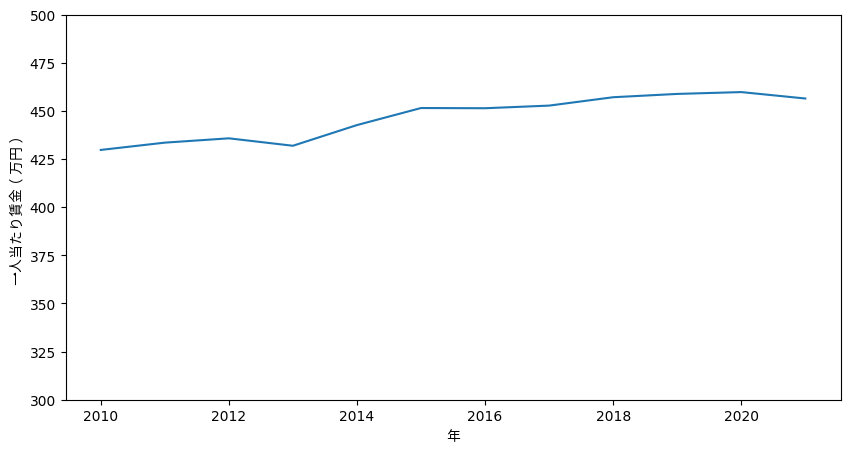

In [63]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_xlabel('年', fontproperties=font_property)
ax.set_ylabel('一人当たり賃金（万円）', fontproperties=font_property)
ax.plot(df_ts_mean['一人当たり賃金（万円）'])
ax.set_ylim(300, 500)
plt.show()

### 年齢階級別の一人当たり賃金の箱ひげ図

In [64]:
print(df_pref_ind.shape)
age_list = df_pref_ind['年齢'].unique()
print(age_list)
df_pref_ind.head()

(113293, 9)
['年齢計' '～19歳' '20～24歳' '25～29歳' '30～34歳' '35～39歳' '40～44歳' '45～49歳'
 '50～54歳' '55～59歳' '60～64歳' '65～69歳' '70歳～']


,集計年,都道府県コード,都道府県名,産業大分類コード,産業大分類名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
0,2010,1,北海道,C,鉱業，採石業，砂利採取業,年齢計,28.19,69.23,407.51
1,2010,1,北海道,C,鉱業，採石業，砂利採取業,～19歳,18.84,19.88,245.96
2,2010,1,北海道,C,鉱業，採石業，砂利採取業,20～24歳,21.14,89.35,343.03
3,2010,1,北海道,C,鉱業，採石業，砂利採取業,25～29歳,25.06,82.05,382.77
4,2010,1,北海道,C,鉱業，採石業，砂利採取業,30～34歳,23.96,60.64,348.16


In [65]:
wage_list = []
for age in age_list:
  print(age)
  wage_temp = df_pref_ind[df_pref_ind['年齢'] == age]['一人当たり賃金（万円）'].values.tolist()
  wage_list.append(wage_temp)
len(wage_list)

年齢計
～19歳
20～24歳
25～29歳
30～34歳
35～39歳
40～44歳
45～49歳
50～54歳
55～59歳
60～64歳
65～69歳
70歳～


13

In [66]:
len(wage_list[0])

9009

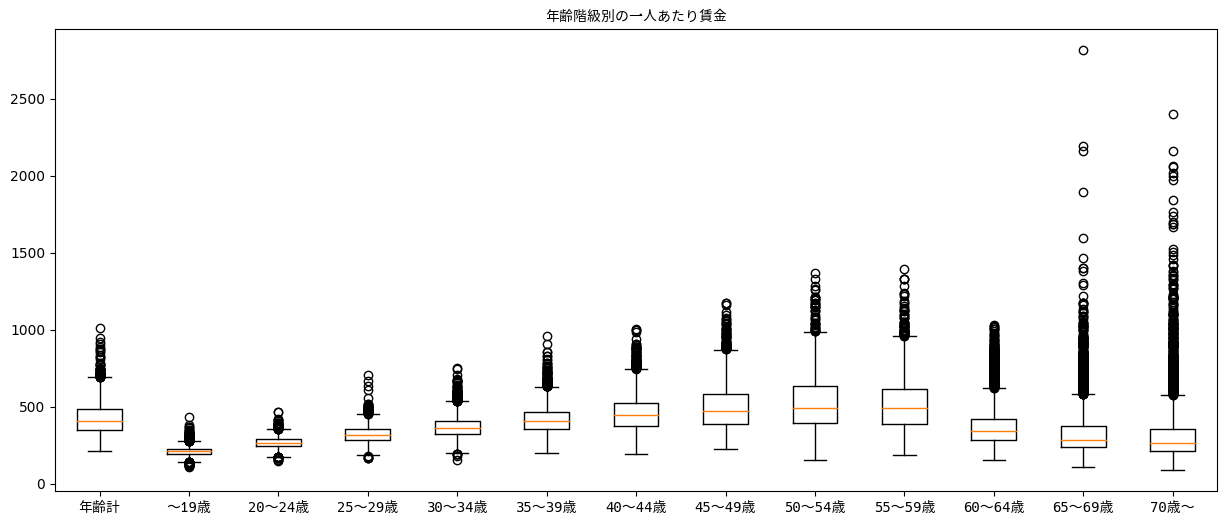

In [67]:
fig = plt.figure(figsize=(15,6))
ax = plt.axes()
ax.set_title('年齢階級別の一人あたり賃金', fontproperties=font_property)
ax.set_xticklabels(age_list, fontproperties=font_property)
ax.boxplot(wage_list)
plt.show()

- 年齢が低いほど四分位範囲が狭い
- 年齢が高いほど四分位範囲が広く, 中央値も高くなっていく, また上限・下限境界も広い
  - 年齢が上がるほど
    - 賃金は高くなっていく?
    - 65歳以降はハズレ値が大きくかなり差が開いているように見える
    - ばらつきも大きくなる
    - 役職につくかどうかによって大きく異なる?
    - 専門性が高い職業についているかどうかで賃金の分岐点がある??

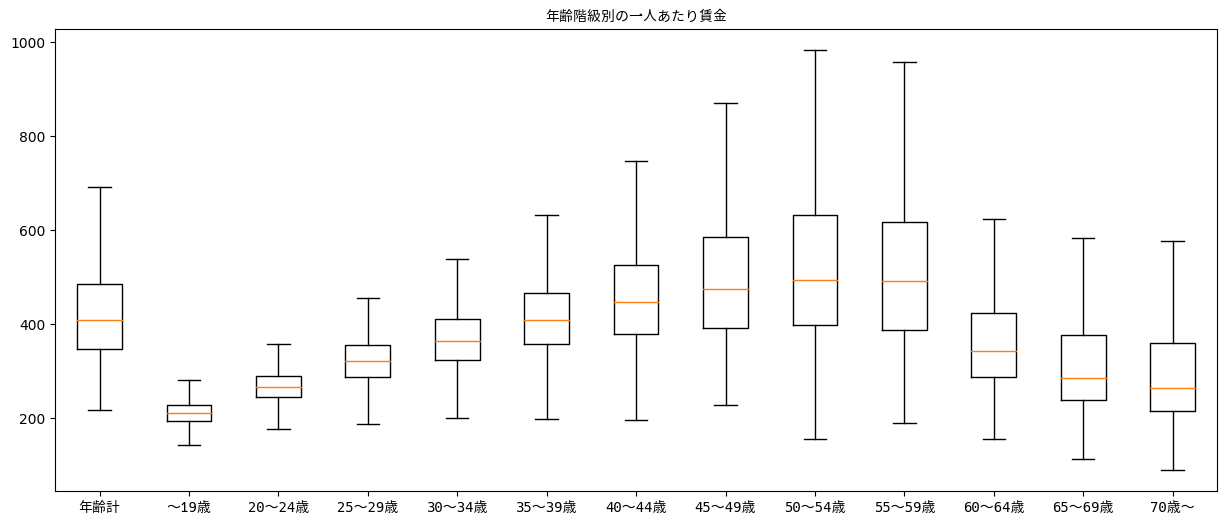

In [68]:
# 外れ値は無視する
fig = plt.figure(figsize=(15,6))
ax = plt.axes()
ax.set_title('年齢階級別の一人あたり賃金', fontproperties=font_property)
ax.set_xticklabels(age_list, fontproperties=font_property)
ax.boxplot(wage_list, showfliers=False)
plt.show()

### 産業別 一人当たり賃金(箱ひげ図)

In [69]:
ind_list = df_pref_ind['産業大分類名'].unique()
print(ind_list)

['鉱業，採石業，砂利採取業' '建設業' '製造業' '電気・ガス・熱供給・水道業' '情報通信業' '運輸業，郵便業' '卸売業，小売業'
 '金融業，保険業' '不動産業，物品賃貸業' '学術研究，専門・技術サービス業' '宿泊業，飲食サービス業' '生活関連サービス業，娯楽業'
 '教育，学習支援業' '医療，福祉' '複合サービス事業' 'サービス業（他に分類されないもの）']


In [70]:
wage_list = []
for name in ind_list:
  print(name)
  wage_temp = df_pref_ind[df_pref_ind['産業大分類名'] == name]['一人当たり賃金（万円）'].values.tolist()
  wage_list.append(wage_temp)

鉱業，採石業，砂利採取業
建設業
製造業
電気・ガス・熱供給・水道業
情報通信業
運輸業，郵便業
卸売業，小売業
金融業，保険業
不動産業，物品賃貸業
学術研究，専門・技術サービス業
宿泊業，飲食サービス業
生活関連サービス業，娯楽業
教育，学習支援業
医療，福祉
複合サービス事業
サービス業（他に分類されないもの）


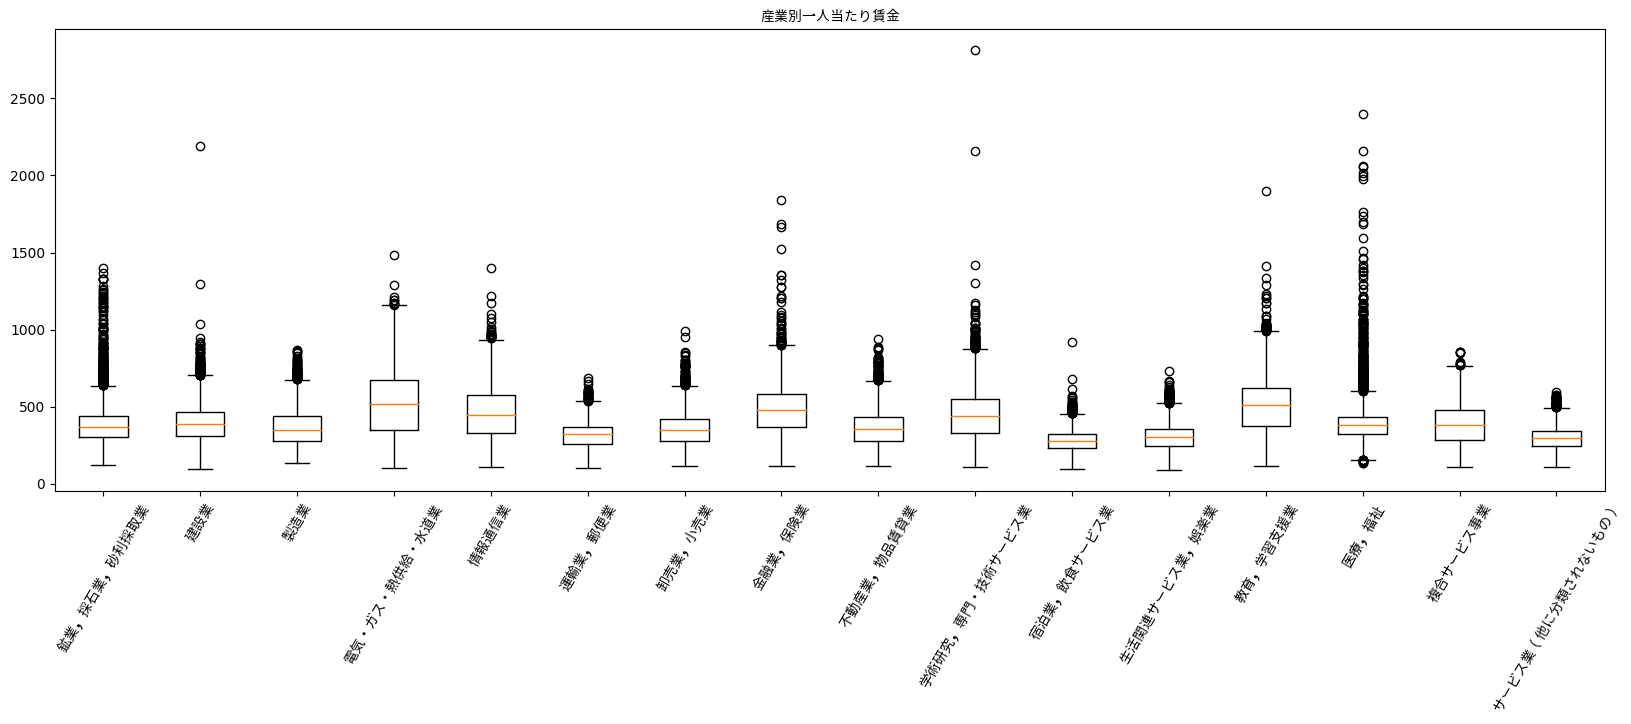

In [71]:
fig = plt.figure(figsize=(20,6))
ax = plt.axes()
ax.set_title('産業別一人当たり賃金', fontproperties=font_property)
ax.set_xticklabels(ind_list, fontproperties=font_property, rotation=60)
ax.boxplot(wage_list)
plt.show()

- 外れ値がめちゃめちゃ多い産業が割と目につく
  - 医療・福祉
    - 医療従事者・福祉従事者間の差異が顕著な感じがする
  - 金融業・保険業
  - 鉱業・採石業

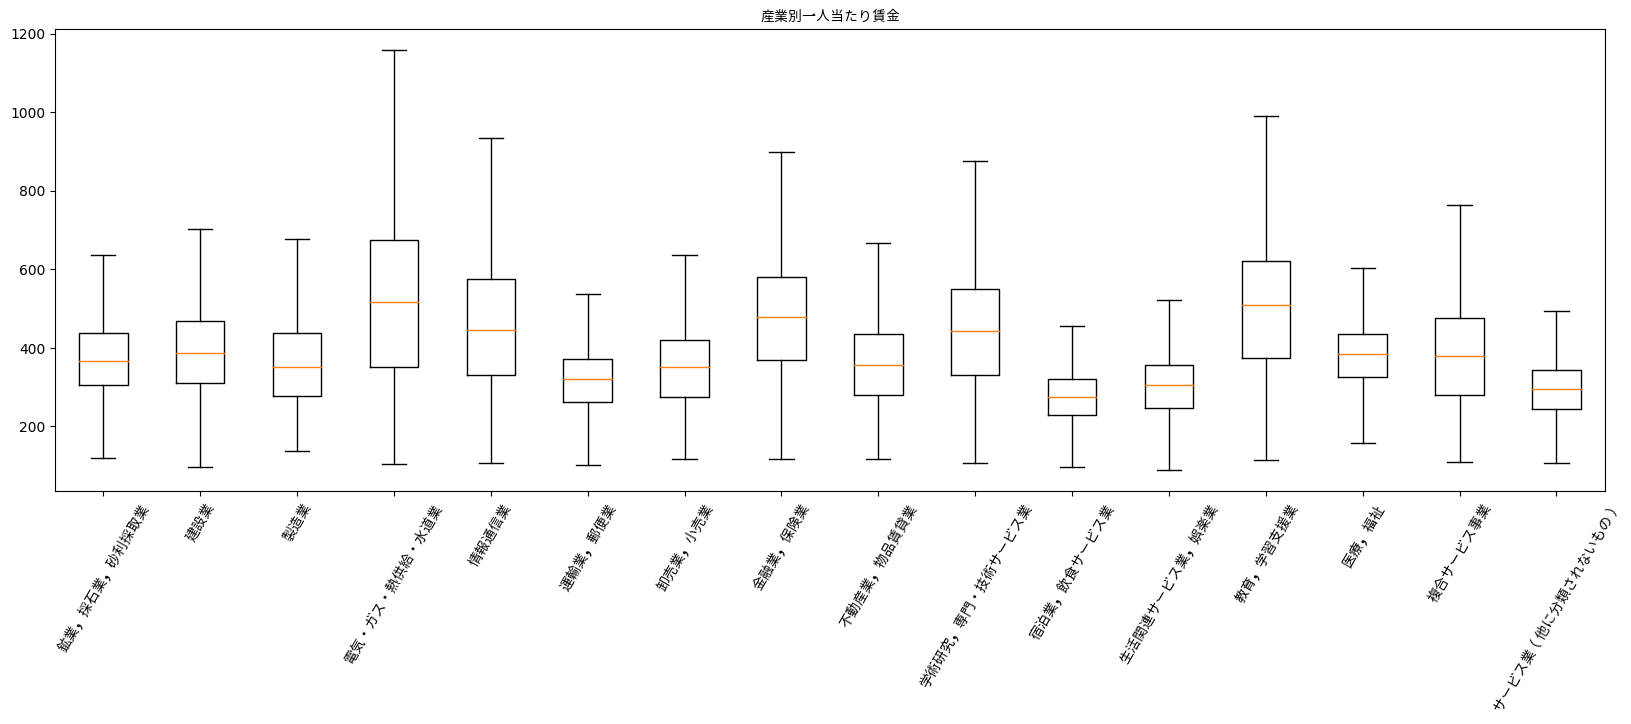

In [72]:
fig = plt.figure(figsize=(20,6))
ax = plt.axes()
ax.set_title('産業別一人当たり賃金', fontproperties=font_property)
ax.set_xticklabels(ind_list, fontproperties=font_property, rotation=60)
ax.boxplot(wage_list, showfliers=False)
plt.show()